# Modèle 5 : Epidémies Vectorielles 

## Présentation 

## Le programme

In [28]:
import numpy as np
import matplotlib.pyplot as plt


class Epidem():

    def __init__(self,b=0.1,c=0.1,d=0.8,H=1000,V=100000,h0=0,v0=0.5):
        
        self.b = b   # b : taux de contagion
        self.c = c   # c : taux de guérison
        self.d = d   # d : taux de mortalité
        self.H = H   # H : nombre d'humains
        self.V = V   # V : nombre de vecteurs
        self.h0 = h0 # h : densité d'humains infectés à l'initiale
        self.v0 = v0  # v : densité de vecteurs infectés à l'initiale
               
        # Valeurs d'équilibre
        self.heq = ( 1 - (self.c*self.d) / (self.b**2 * self.V/self.H) ) / ( 1 + self.c / (self.b * self.V/self.H) )
        self.veq = ( 1 - (self.c*self.d) / (self.b**2 * self.V/self.H) ) / ( 1 + self.d / self.b )
        
        # Convergence du système vers les valeurs d'équilibre
        self.h, self.v = self.getTraj()
        
        # "Mosquito theorem", Ross  
        self.Ro = self.V/self.H * self.b**2 / (self.c*self.d)
        if self.Ro < 1:
            self.message = "Eradication de la maladie"
        else:
            self.message = "Propagation de la maladie"
       
    def getTraj(self):

        # Paramètres
        self.T  = 1             # période de temps [an]
        self.dt = self.T / 12   # pas de temps [an]
        h  = []     
        v  = []     
        h.append(self.h0)  
        v.append(self.v0)

        # Calcul de la trajectoire du systeme

        for it in range(1,12):

            h.append( ( self.b * self.V/self.H * ( 1 - h[it-1] ) * v[it-1] - self.c * h[it-1] ) * self.dt + h[it-1] )
            v.append( ( self.b * ( 1 - v[it-1] ) * h[it-1] - self.d * v[it-1] ) * self.dt + v[it-1] ) 
            
        return h,v
    
    def plot(self):
        
        plt.figure(figsize=(5,5))
        plt.plot(self.h,self.v)
        plt.quiver(np.arange(0,1,self.dt), self.h, self.v)
        plt.xlabel("h : densité d'humains infectés")
        plt.ylabel("v : densité de vecteurs infectés")
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.text(1.1, 0.8, "Ro = " + str(self.Ro) +"\n" + self.message)
        plt.show()
        
        return


## Application 

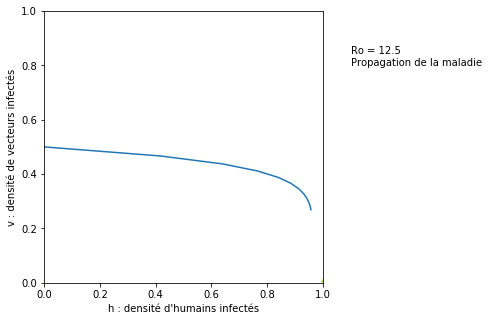

In [31]:
ep = Epidem()
ep.plot()

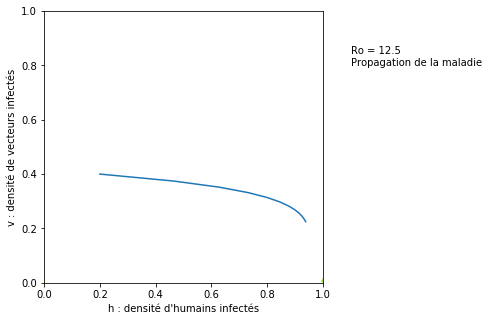

In [32]:
ep1 = Epidem(h0=0.2,v0=0.4)
ep1.plot()

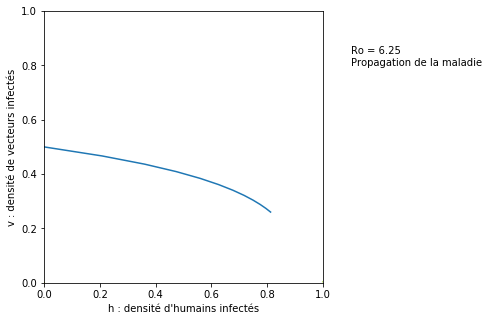

In [33]:
ep2 = Epidem(H=2000)
ep2.plot()